<h3 style='text-align: center;'>Physics 1 HW - Kinematics 🚀</h3>

### 1. Yuval Kogan - 207840042
### 2. Yaniv Bodaga - 314700428

<p dir="rtl">כוכב הלכת E נע במעגל סביב השמש, שנמצאת בראשית הצירים. רדיוס המעגל R וזמן המחזור T. גם כוכב הלכת M נע במעגל סביב השמש ברדיוס 1.52 R ובזמן מחזור 1.88 T. שני המעגלים באותו המישור. ברגע שאותו בחרנו t = 0 הזווית בין הקוטר המחבר את שני כוכבי הלכת היא 180°.</p>

<p dir="rtl">1. שרטטו על גרף אחד את מסלול כוכבי הלכת. הוסיפו נקודה עבור השמש. הגרילו רגע שרירותי וציירו נקודה (כחולה E ואדומה M) עבור כל אחד מכוכבי הלכת על המסלול שלו.</p>

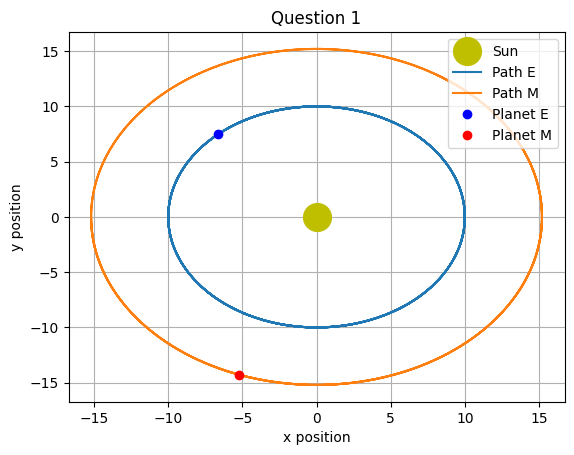

In [79]:
import numpy as np
import matplotlib.pyplot as plt

R = int(input("Enter the radius R for star E: "))
T = int(input("Enter the period time T for start E: "))
pi = np.pi

radius_E = R
period_time_E = T

radius_M = R * 1.52
period_time_M = T * 1.88

# Helper function to calculate the position of an object in a uniform circular motion.
def position(theta, radius):
    return radius * np.cos(theta) , radius * np.sin(theta)

dt = 0.01
t = np.arange(0, T * 5, dt) # Time array 

# angular velocity (little omega) = 2pi/T
theta_E = 2 * pi * t / period_time_E
theta_M = 2 * pi * t / period_time_M + pi # The extra pi comes from the fact that at t_0 the initial angle between the planets is 180 degrees.

E_x_position, E_y_position = position(theta_E, radius_E) 
M_x_position, M_y_position = position(theta_M, radius_M)

# Question 1
plt.title("Question 1")
plt.xlabel("x position")
plt.ylabel("y position")
plt.plot(0, 0, "yo", ms = 20, label = "Sun")


plt.plot(E_x_position, E_y_position, label = "Path E")
plt.plot(M_x_position, M_y_position, label = "Path M")

moment_t = np.random.randint(1000)

plt.plot(E_x_position[moment_t], E_y_position[moment_t], "bo" , label = "Planet E")
plt.plot(M_x_position[moment_t], M_y_position[moment_t], "ro" , label = "Planet M")
plt.legend(loc = "upper right")
plt.grid()

plt.show()

<p dir="rtl">2.מתי כוכב הלכת M חוזר לראשונה לאותו מקום בשמיים כפי שהוא נצפה מכוכב הלכת E? נסמן את זמן זה ב T_3.</p>

In [80]:
# Explanation and formulas in the appendix
T3 = 2.136 * period_time_E
print(f"The first time in which planet M returns to the same location as seen by planet E is at {T3:.2f} seconds.")

The first time in which planet M returns to the same location as seen by planet E is at 32.04 seconds.


<p dir="rtl">3. שרטטו גרף של מיקום M ביחס ל-E מרגע t=0 ועד t = T_3.</p>

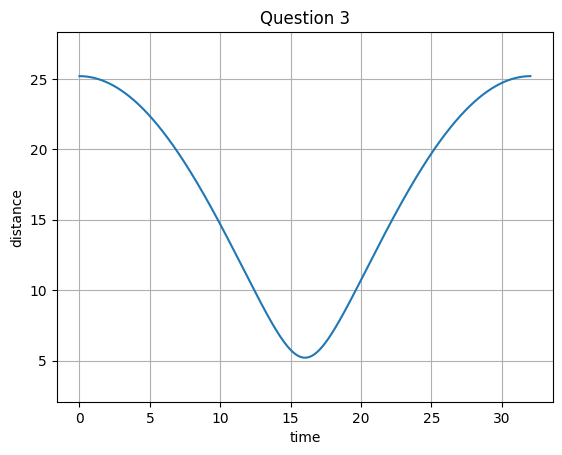

In [81]:
# Question 3
t_new = np.arange(0, T3, dt)
theta_E = 2 * pi * t_new / period_time_E
theta_M =  2 * pi * t_new / period_time_M + pi

E_x_position, E_y_position = position(theta_E, radius_E)
M_x_position, M_y_position = position(theta_M, radius_M)

distance = np.sqrt((E_x_position - M_x_position)**2 + (E_y_position - M_y_position) ** 2)

# Plot the diagram
plt.plot(t_new, distance)
plt.title("Question 3")
plt.xlabel('time')
plt.ylabel('distance')
plt.axis('equal')
plt.grid('true')
plt.show()

<p dir="rtl">4. מיצאו את הזווית בין ווקטור המקום של M ביחס לE וציר x הציגו אותה בגרף. (הדרכה: השתמשו בפקודות numpy.unwrap ,numpy.arctan2.) השתמשו בגרפים שיצרתם כדי להסביר מהי תופעת התנועה האחורית (retrograde motion) באסטרונומיה. כיתבו קוד המוצא את משך זמן התנועה האחורית של M ביחס לE. מהי התוצאה המתקבלת?</p>

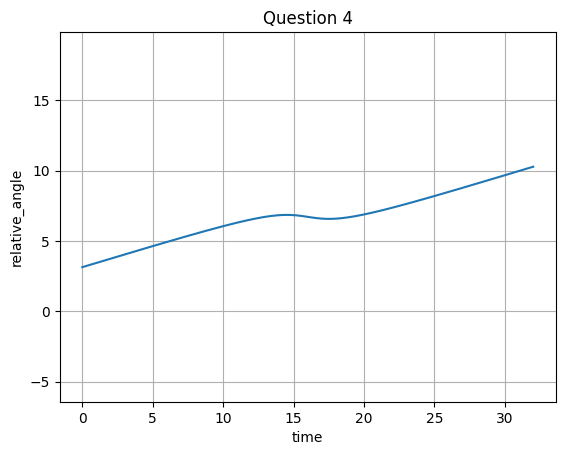

Retrograde motion duration is: 2.99 seconds


In [82]:
# Question 4
relative_angle = np.unwrap(np.arctan2(M_y_position - E_y_position, M_x_position - E_x_position))
plt.plot(t_new,relative_angle)
plt.title("Question 4")
plt.xlabel('time')
plt.ylabel('relative_angle')
plt.axis('equal')
plt.grid(True)
plt.show()

# Get the duration of the retrograde motion.
result = np.gradient(relative_angle)/dt
zero_cross = np.where(np.diff(np.sign(result)))[0]
retrograde_motion_time = t_new[zero_cross[1]] - t_new[zero_cross[0]]
print(f"Retrograde motion duration is: {retrograde_motion_time:.2f} seconds")

<p dir="rtl">
<strong>תנועה אחורית (מכונה גם נסיגה) באסטרונומיה</strong> מתייחסת לתופעה בה כוכבי הלכת נראים כאילו הם מחליפים את כיוון תנועתם יחסית לכוכבי השבת באופן זמני, ולאחר מכן חוזרים שוב לכיוון תנועתם המקורי (התנועה "הקדומנית" של כוכבי הלכת). תופעה זו נובעת מהתנועה היחסית של כדור הארץ וכוכבי הלכת במסלולם סביב השמש.
</p>

<h3 dir="rtl">הסבר על תנועה אחורית:</h3>
<p dir="rtl">
כדי לזהות תנועה אחורית, ניתן לחשב את קצב השינוי של ההפרש הזוויתי בין M ל-E בזמן:
</p>

<ul dir="rtl">
<li><strong>מהירות זוויתית חיובית</strong> - מצביעה על תנועה רגילה, כלומר M מקדים את E במסלול.</li>
<li><strong>מהירות זוויתית שלילית</strong> - מצביעה על תנועה אחורית, כלומר M מפגר אחרי E בתצפית.</li>
</ul>


<p dir="rtl">5. מהו הזמן שחולף בין שתי פעמים בהן M וE רחוקים ביותר זה מזה? מהו המרחק הגדול ביותר בין הכוכבים, ומהו המרחק הקטן ביותר ביניהם? הציגו גרפים מתאימים.</p>

In [83]:
# Question 5 
relative_x = E_x_position - M_x_position
relative_y = E_y_position - M_y_position

relative_distance = np.sqrt(relative_x**2 + relative_y**2)
max_distance = np.max(relative_distance)
min_distance = np.min(relative_distance)

print(f"Max distance: {max_distance:.2f} R, Min distance: {min_distance:.2f} R" +
    f"\nThe time it takes for the planets to get to the location of their largest distance is: {T3:.2f} seconds." )

Max distance: 25.20 R, Min distance: 5.20 R
The time it takes for the planets to get to the location of their largest distance is: 32.04 seconds.


<p dir="rtl">6. אלון מבקש לשגר חללית מE לM מהירות החללית 0.01R\T נסמן בt=t_0 את הרגע בו הכוכבים קרובים ביותר זה לזה. מתי החללית צריכה לצאת לדרך כדי שתגיע לM בזמן המסע הקצר היותר?</p>

In [84]:
# Question 6
t_initial = 1
t_travel = 52*period_time_E + t_initial

t_launch = t_travel - t_initial
print(f"The most optimal time for Alon to fly his space craft is at: {t_launch:.2f} seconds.")

The most optimal time for Alon to fly his space craft is at: 780.00 seconds.


### 1. Yuval Kogan - 207840042
### 2. Yaniv Bodaga - 314700428